# Hough transform

Using the input step, we repeat the edge detection:

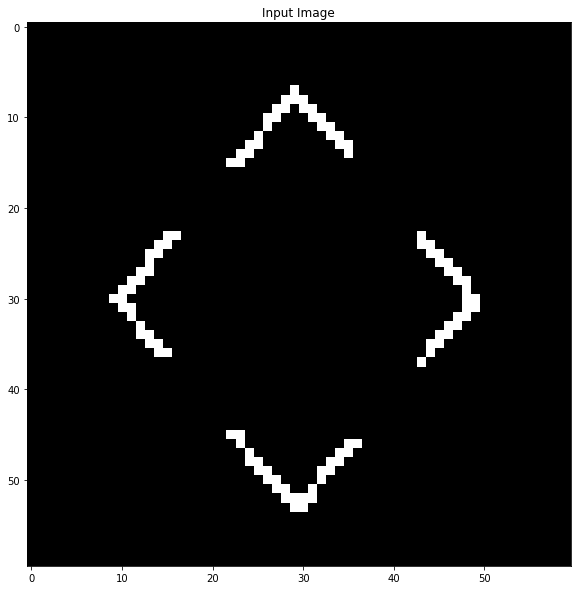

In [225]:
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np

input_dir = './input/'
in_img_name = 'hough_test.png'
in_img = cv.imread(input_dir + in_img_name, cv.IMREAD_GRAYSCALE)

# in_img = np.zeros((50,50))
# in_img[25, 25] = 1
# in_img[20, 20] = 1
# canny_thresholds = [300, 400]
# edges = cv.Canny(in_img, canny_thresholds[0], canny_thresholds[1])
plt.figure(figsize=(15,10))
plt.imshow(in_img,cmap = 'gray')
plt.title('Input Image')
plt.show()

In [226]:
# Hough transform immpl
img = in_img
rho_step = 1
theta_step = np.pi / 180
threshold = 18
min_theta = -np.pi/2
max_theta = np.pi

w, h = in_img.shape

max_rho = w + h
min_rho = -max_rho

# number of values for rho and theta based on input params
num_angle = int(np.floor((max_theta - min_theta) / theta_step) + 1)
num_rho = int(np.round((max_rho - min_rho + 1) / rho_step))

accum = np.zeros((num_rho + 2, num_angle + 2), int)

for i in range(h):
  for j in range(w):
    if in_img[i][j] != 0:
      for n in range(num_angle):
        # theta angle in radians
        angle = min_theta + n * theta_step
        # Rho formula based on theory in hough space
        r = round(j * math.cos(angle) + i * math.sin(angle))
        # Move to center
        r += (num_rho - 1) / 2
        accum[int(r+1)][n+1] += 1


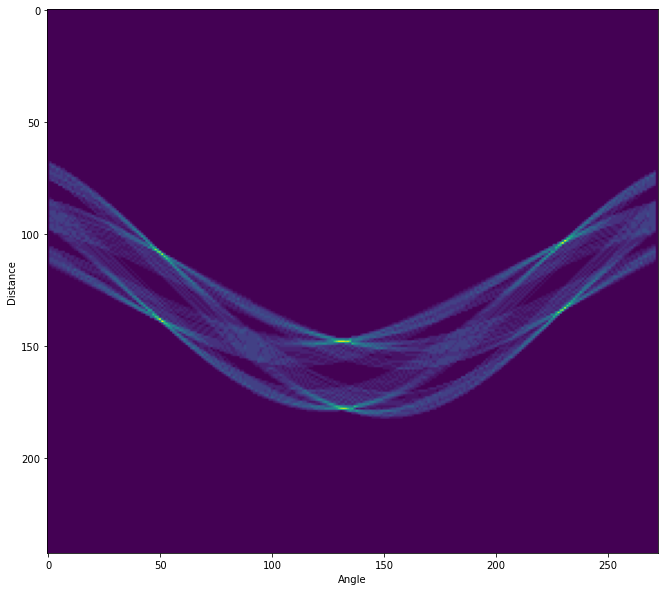

In [227]:
# print accumulator
plt.figure(figsize=(15,10))
plt.imshow(accum)
plt.xlabel('Angle')
plt.ylabel('Distance')
plt.axis('image')
plt.show()

In [228]:
# find local maximums

maximums = []

for r in range(1, num_rho):
    for n in range(1, num_angle):
        if accum[r][n] > threshold and \
           accum[r][n] > accum[r][n - 1] and \
           accum[r][n] > accum[r][n + 1] and \
           accum[r][n] > accum[r - 1][n] and \
           accum[r][n] > accum[r + 1][n]:
            maximums.append((r,n))

print(maximums)

[(103, 231), (104, 230), (109, 51), (133, 231), (138, 50), (139, 51), (148, 134), (178, 132)]


In [229]:
# sort by accumulator value
maximums.sort(key=lambda rho_theta: accum[rho_theta[0]][rho_theta[1]])
print(maximums)

[(148, 134), (178, 132), (109, 51), (133, 231), (103, 231), (104, 230), (138, 50), (139, 51)]


In [230]:
# create list of lines

lines = []

for i in range(len(maximums)):
    r = maximums[i][0]
    n = maximums[i][1]
    rho = (r - (num_rho - 1)*0.5) * rho_step
    angle = min_theta + n * theta_step
    lines.append({ 'rho': rho, 'angle': angle })


print(lines)

[{'rho': 28.0, 'angle': 0.7679448708775052}, {'rho': 58.0, 'angle': 0.7330382858376185}, {'rho': -11.0, 'angle': -0.6806784082777885}, {'rho': 13.0, 'angle': 2.4609142453120043}, {'rho': -17.0, 'angle': 2.4609142453120043}, {'rho': -16.0, 'angle': 2.443460952792061}, {'rho': 18.0, 'angle': -0.6981317007977318}, {'rho': 19.0, 'angle': -0.6806784082777885}]


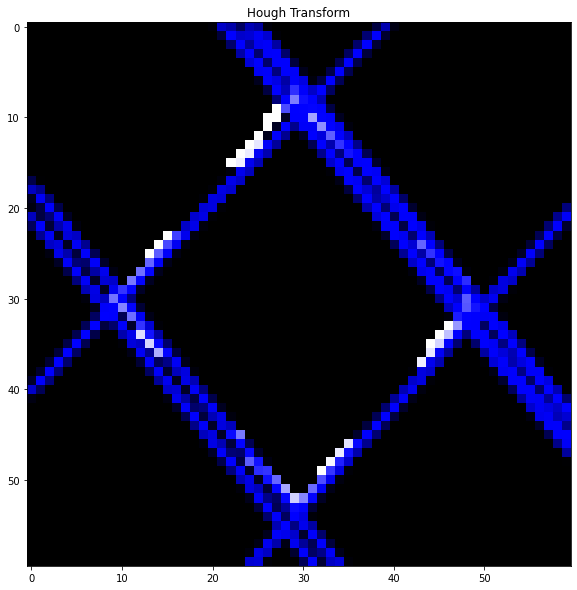

In [231]:
# Draw the lines
output = cv.cvtColor(in_img, cv.COLOR_GRAY2BGR)

if lines is not None:
    scalar = 1e3
    for i in range(len(lines)):
        rho = lines[i]['rho']
        theta = lines[i]['angle']
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + scalar*(-b)), int(y0 + scalar*(a)))
        pt2 = (int(x0 - scalar*(-b)), int(y0 - scalar*(a)))
        cv.line(output, pt1, pt2, (0,0,255), 1, cv.LINE_AA)

plt.figure(figsize=(15,10))
plt.imshow(output)
plt.title('Hough Transform')
plt.show()